In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("sonar.csv")
df.head

<bound method NDFrame.head of          Q1      Q2      Q3      Q4      Q5      Q6      Q7      Q8      Q9  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
6    0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
7    0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
8    0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
9    0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   
10   0.0039  0.0063  0.0152  0.0336  0.0310  0.0284  0.0396  0.0272  0.0323   
11   0.0123  0.0309  0

In [5]:
df = pd.DataFrame(data = df)

In [6]:
df.head

<bound method NDFrame.head of          Q1      Q2      Q3      Q4      Q5      Q6      Q7      Q8      Q9  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
6    0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
7    0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
8    0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
9    0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   
10   0.0039  0.0063  0.0152  0.0336  0.0310  0.0284  0.0396  0.0272  0.0323   
11   0.0123  0.0309  0

In [9]:
from sklearn.decomposition import PCA

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

In [12]:
df['OUT']= le.fit_transform(df['OUT'])

In [13]:
df.head

<bound method NDFrame.head of          Q1      Q2      Q3      Q4      Q5      Q6      Q7      Q8      Q9  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
6    0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
7    0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
8    0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
9    0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   
10   0.0039  0.0063  0.0152  0.0336  0.0310  0.0284  0.0396  0.0272  0.0323   
11   0.0123  0.0309  0

In [14]:
x = df.iloc[:,0:-1]
x

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0195,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0052,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0061,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0118,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040


In [15]:
pca = PCA(10)
x = pca.fit_transform(x)

In [16]:
x.shape

(208, 10)

In [18]:
x = pd.DataFrame(data = x)
x

,0,1,2,3,4,5,6,7,8,9
0,0.576093,0.319393,-0.387291,-0.378009,-0.243780,-0.156243,-0.427736,0.074832,-0.024347,0.318054
1,-0.970667,1.018039,0.834156,0.107423,0.286070,0.178684,-0.260332,0.385600,-0.004030,-0.072529
2,-0.325887,0.874209,0.246015,0.863031,0.069110,-0.300833,-0.412807,0.075321,-0.010855,-0.438559
3,0.852035,0.690863,-0.013390,-0.110257,-0.554050,0.397968,0.492569,-0.220460,0.537003,-0.436795
4,-0.064756,0.222968,0.638601,0.140432,0.135854,0.052881,-0.386558,0.066549,-0.117006,-0.419277
5,-0.608317,0.898897,0.817682,0.270711,0.488945,0.439784,-0.272468,0.103174,0.204657,-0.241841
6,-0.157484,0.395668,-0.231787,-0.170914,-0.200450,0.389863,0.029272,-0.035824,-0.100416,-0.505885
7,-0.606290,-0.047287,-0.010420,-0.253736,-0.664263,0.062608,-0.119011,0.208053,0.018237,0.268035
8,-0.383375,-0.073554,-0.038443,-0.267694,-0.533765,-0.488571,0.153830,-0.071252,0.252838,0.273258
9,-0.183578,-1.011676,0.083793,-0.312129,0.019067,-0.088054,0.223044,-0.173229,-0.077323,-0.283125


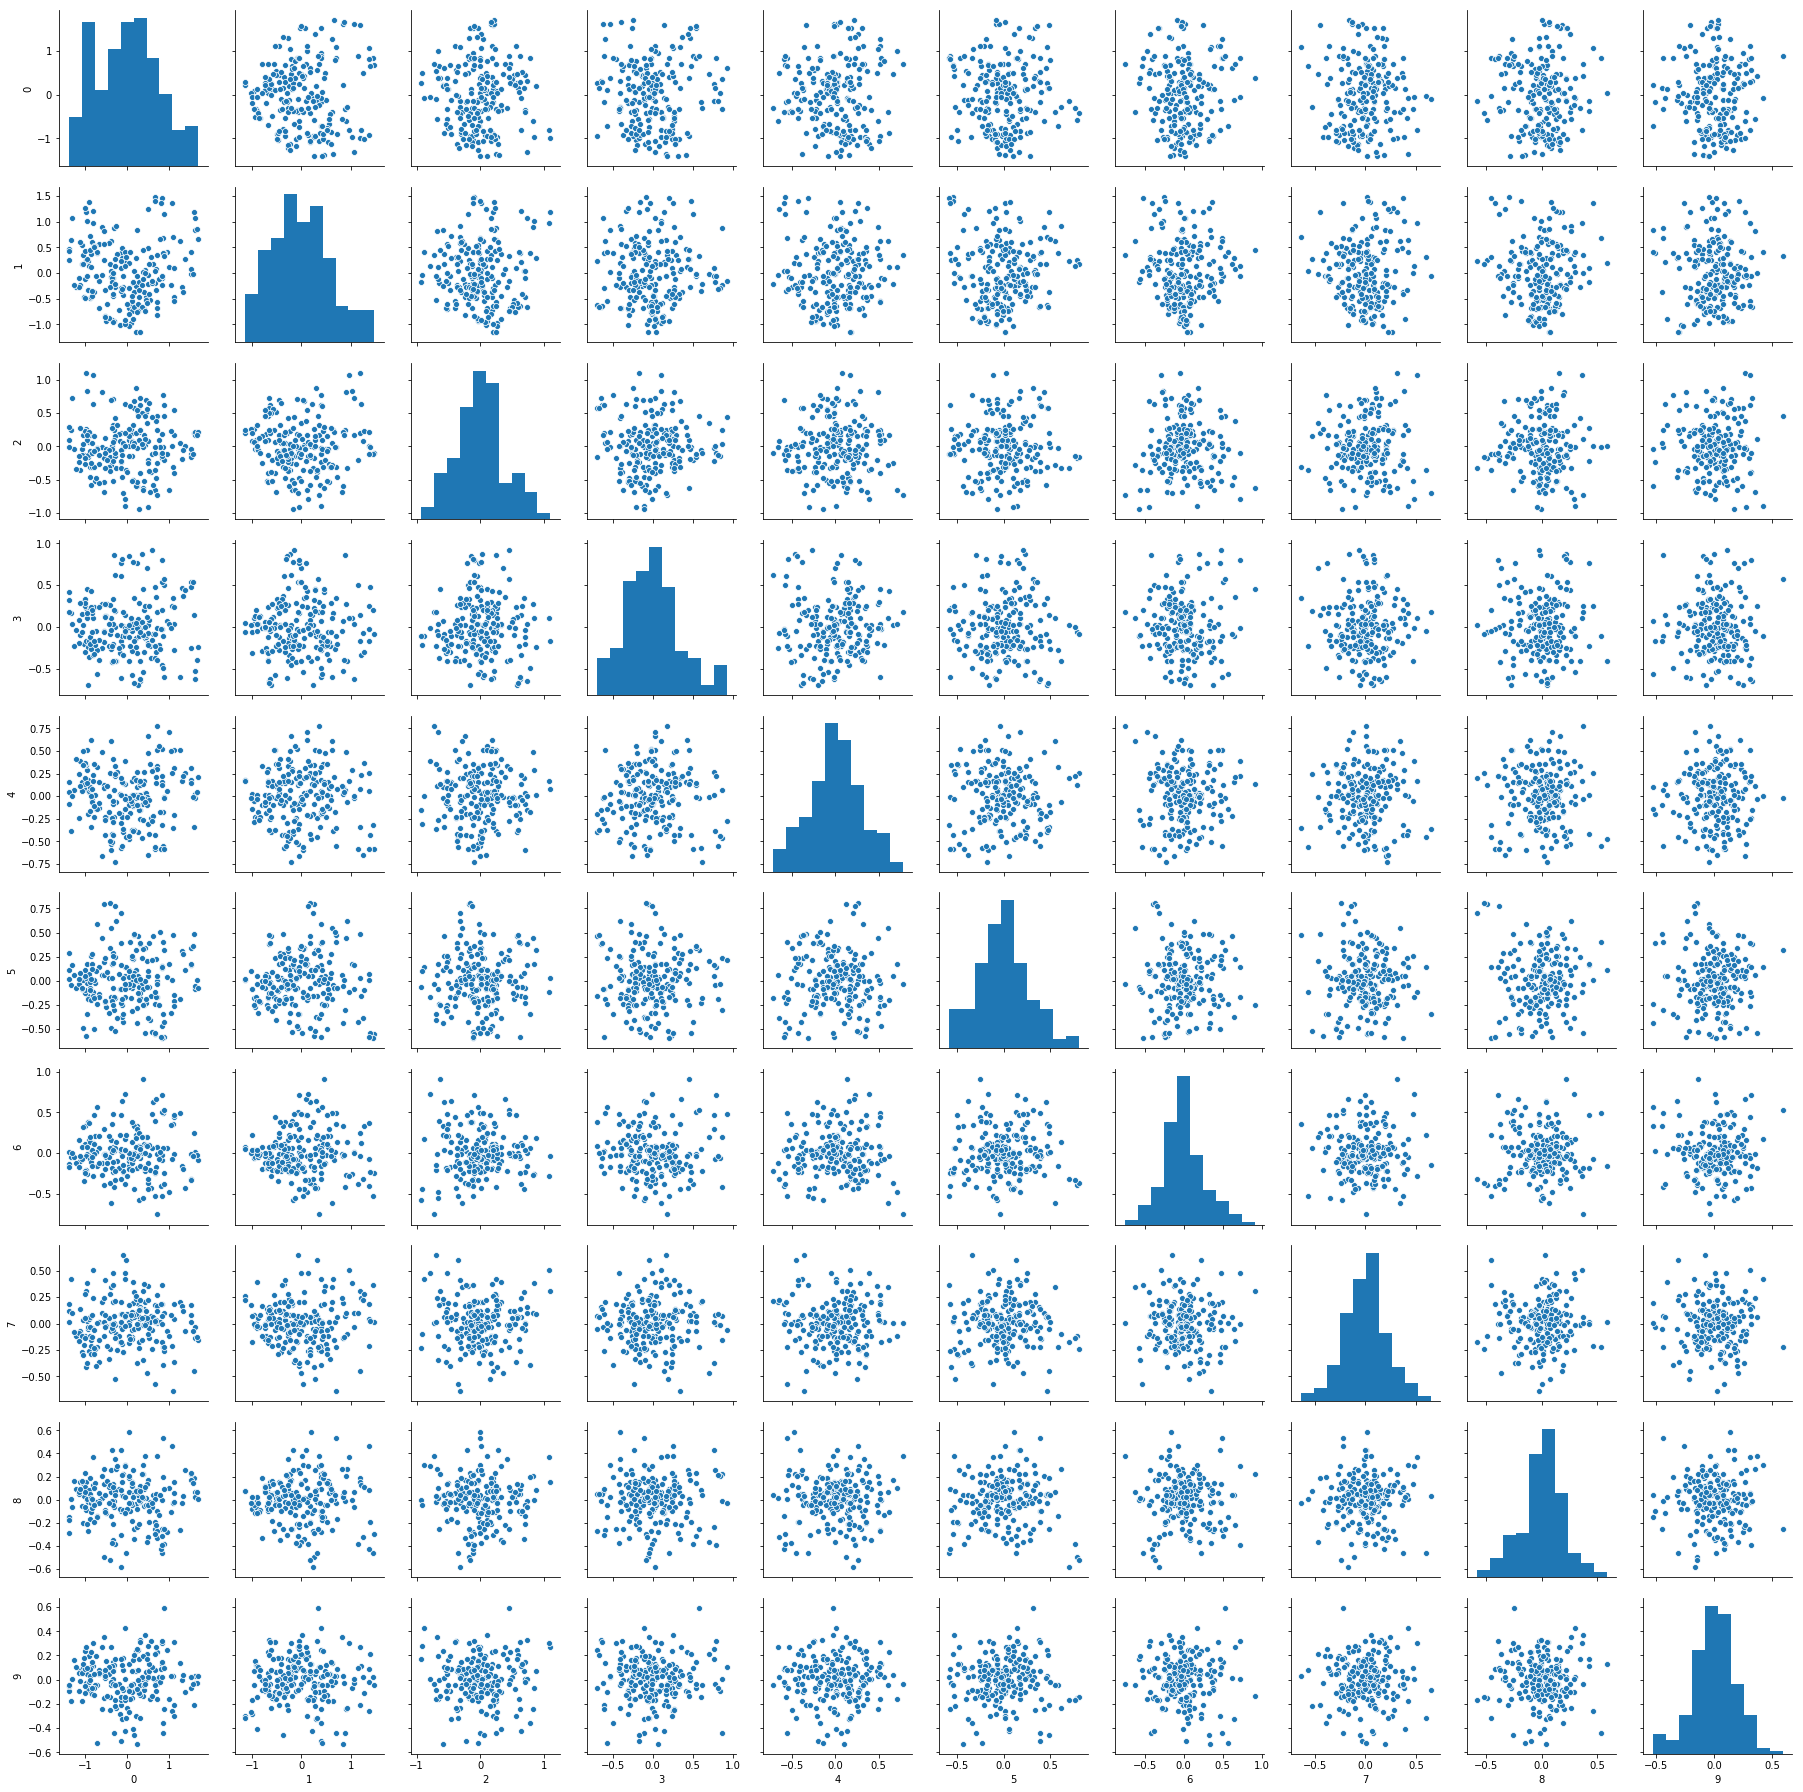

In [19]:
sns.pairplot(x)

In [23]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[0.39955135, 0.04064823, 0.02692565, ..., 0.17167808, 0.65894689,
        1.06973356],
       [0.70353822, 0.42163039, 1.05561832, ..., 0.44455424, 0.41985233,
        1.06973356],
       [0.12922901, 0.60106749, 1.72340448, ..., 0.25276128, 0.25758223,
        1.06973356],
       ...,
       [1.00438083, 0.16007801, 0.67384349, ..., 0.03913824, 0.67887143,
        0.93481221],
       [0.04953255, 0.09539176, 0.13480381, ..., 0.70402047, 0.34015415,
        0.93481221],
       [0.13794908, 0.06497869, 0.78861924, ..., 0.29860448, 0.99479044,
        0.93481221]])

In [24]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,OUT
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,1
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,1
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,1
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,1
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,1


In [27]:
x = x[(z<3).all(axis=1)]
x.head

<bound method NDFrame.head of             0         1         2         3         4         5         6  \
0    0.576093  0.319393 -0.387291 -0.378009 -0.243780 -0.156243 -0.427736   
1   -0.970667  1.018039  0.834156  0.107423  0.286070  0.178684 -0.260332   
4   -0.064756  0.222968  0.638601  0.140432  0.135854  0.052881 -0.386558   
6   -0.157484  0.395668 -0.231787 -0.170914 -0.200450  0.389863  0.029272   
7   -0.606290 -0.047287 -0.010420 -0.253736 -0.664263  0.062608 -0.119011   
8   -0.383375 -0.073554 -0.038443 -0.267694 -0.533765 -0.488571  0.153830   
9   -0.183578 -1.011676  0.083793 -0.312129  0.019067 -0.088054  0.223044   
10   1.116022 -0.465768  0.177698 -0.282765  0.314286 -0.210456 -0.013804   
11  -0.108916 -0.262626  0.028527 -0.332855 -0.396414 -0.429698 -0.233289   
12  -0.941129  0.229139 -0.163984 -0.699324 -0.201672 -0.160834  0.379504   
13   0.423281  0.053140  0.015598 -0.127669  0.032706  0.335872 -0.217478   
14   0.051612  0.192797 -0.000973 -0.411552 -0

In [28]:
y = df.iloc[:,-1].values

In [29]:
x.values

array([[ 0.57609252,  0.31939293, -0.38729087, ...,  0.07483224,
        -0.0243473 ,  0.31805393],
       [-0.97066736,  1.01803924,  0.83415586, ...,  0.38560046,
        -0.00402969, -0.07252885],
       [-0.06475555,  0.22296778,  0.63860123, ...,  0.06654869,
        -0.11700559, -0.41927727],
       ...,
       [ 0.29773311, -1.15185988,  0.25009557, ...,  0.22590366,
         0.07212978, -0.31304369],
       [-0.04576078, -0.99596955,  0.19967707, ...,  0.067444  ,
         0.02577086, -0.17111974],
       [-0.05111456, -0.91252627,  0.00890966, ..., -0.0208684 ,
        -0.11899179, -0.1441342 ]])

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.33, random_state=47)

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [34]:
ins = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), SVC(), KNeighborsClassifier()]

for i in ins:
    i.fit(x_train,y_train)
    print(i, i.score(x_train,y_train))
    pred = i.predict(x_test)
    print("\n accuracy score:", accuracy_score(y_test,pred))
    print("\n confusion matrix:", confusion_matrix(y_test,pred))
    print("\n classification report:", classification_report(y_test,pred))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) 0.8392857142857143

 accuracy score: 0.6964285714285714

 confusion matrix: [[24  4]
 [13 15]]

 classification report:               precision    recall  f1-score   support

           0       0.65      0.86      0.74        28
           1       0.79      0.54      0.64        28

   micro avg       0.70      0.70      0.70        56
   macro avg       0.72      0.70      0.69        56
weighted avg       0.72      0.70      0.69        56

GaussianNB(priors=None, var_smoothing=1e-09) 0.8214285714285714

 accuracy score: 0.7857142857142857

 confusion matrix: [[25  3]
 [ 9 19]]

 classification report:               precision    recall  f1-score   support

           0       0.74      0.89      0.81        28
           1   